In [1]:
#Set working directory
import os
os.chdir("C:/Users/VB018797/Documents/Bike Rental Project")

In [2]:
#Get the current working directory##
os.getcwd()

'C:\\Users\\VB018797\\Documents\\Bike Rental Project'

In [3]:
#Import libraries
import os
import pandas as pd
import numpy as np

In [4]:
#Load the data from csv
bike_data = pd.read_csv("day.csv", sep=',')

In [5]:
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_data.shape

(731, 16)

In [7]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
###Data Preprocessing ###
#First we do the Missing Value Analysis in the data by finding any missing values##
##Calculate the missing values in the data##
missing_val = pd.DataFrame(bike_data.isnull().sum())

In [9]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
##Since there is no missing values exist in the data we will not be performing any missing value analysis

In [11]:
#Some more data preprocessing
#Variable instant is not adding anything meaningful to the data hence we will be deleting the column instant
bike_data.drop(['instant'], axis=1, inplace=True)

In [12]:
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#Convert the datatype of variables season, yr, mnth, holiday, weekday, workingday, weathersit from int to categorical
bike_data['season']= bike_data['season'].astype('category')
bike_data['yr']= bike_data['yr'].astype('category')
bike_data['mnth'] = bike_data['mnth'].astype('category')
bike_data['holiday'] = bike_data['holiday'].astype('category')
bike_data['weekday']= bike_data['weekday'].astype('category')
bike_data['workingday']= bike_data['workingday'].astype('category')
bike_data['weathersit'] = bike_data['weathersit'].astype('category') 

In [14]:
bike_data.dtypes

dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [15]:
##The independent variable dteday is of type object having a string data with Month Date and Year.
#Hence we are converting this character string into a date variable having only the date value and 
#And converting into a category from 1 to 31 levels
bike_data['dteday']= bike_data.dteday.str[8:10]
bike_data['dteday'] = bike_data['dteday'].astype('category')

In [16]:
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
bike_data.dtypes

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [18]:
## cnt is a sum total of variable values of casual and registered. Hence we can drop the variables casual and registered
bike_data.drop(['casual','registered'], axis=1, inplace=True)

In [19]:
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [20]:
bike_data.shape

(731, 13)

In [21]:
#Outlier Analysis

#First plot boxplot for visualization
from matplotlib import pyplot as plt

plt.boxplot(bike_data['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd4fb9b390>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd4fb9ba20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4fb83f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd4fb9be48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd4fba9438>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd4fd5feb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd4fd6d5f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4fd5fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd4fd6dc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd4fd6dfd0>],
 'means': []}

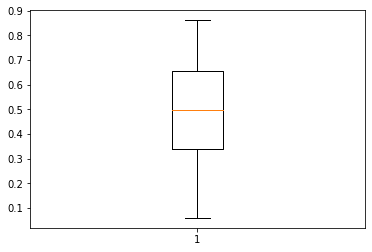

In [22]:
plt.boxplot(bike_data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd4fdebf28>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd4fdf8940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4fdebdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd4fdf8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd4fdf8f60>],
 'means': []}

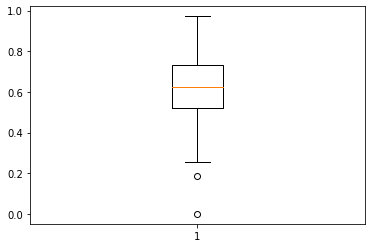

In [23]:
plt.boxplot(bike_data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd4fe5d320>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd4fe5da20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4fe50eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd4fe5de48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd4fe68438>],
 'means': []}

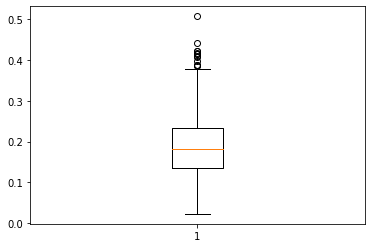

In [24]:
plt.boxplot(bike_data['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd4feb9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd4fe9a978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd4feb9cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd4fe9ada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd4fed0390>],
 'means': []}

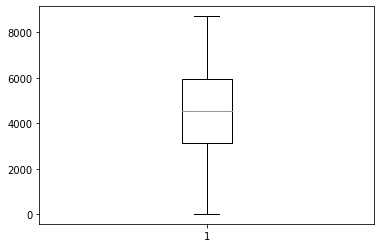

In [25]:
plt.boxplot(bike_data['cnt'])

In [26]:
#df = bike_data.copy()
#bike_data = df.copy()

In [27]:
#Removing Outliers for hum and windspeed variables only since other independent continouos variables are not having outliers
column_names = ["hum","windspeed"]
for i in column_names :
    q75, q25 = np.percentile(bike_data.loc[:,i], [75,25])
    iqr = q75 - q25
    
    min1 = q25 - (iqr*1.5)
    max1 = q75 + (iqr*1.5)
    
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min1].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max1].index)
  

In [28]:
bike_data.shape

(717, 13)

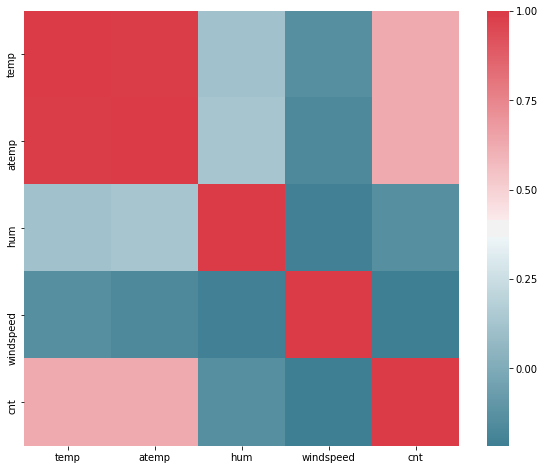

In [29]:
##Feature Selection###
## Correlation analysis to verify collinerarity between the data.
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))

corr = bike_data.corr()

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool), cmap = sns.diverging_palette(220, 10, as_cmap =True), 
square=True, ax=ax)

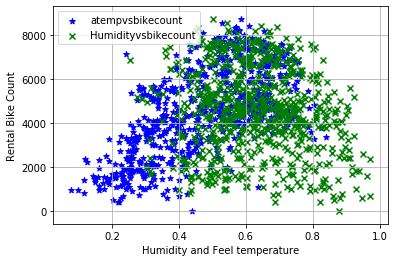

In [30]:
#Scatter plot for the continuous variables feel temperature atemp variable and humidity hum variable
plt.scatter(bike_data['atemp'],bike_data['cnt'], color = 'b', marker = '*', label = 'atempvsbikecount')
plt.scatter(bike_data['hum'], bike_data['cnt'],color='g', marker = 'x', label='Humidityvsbikecount')
plt.xlabel('Humidity and Feel temperature')
plt.ylabel('Rental Bike Count')
plt.legend()
plt.grid()

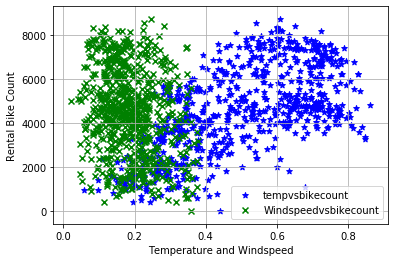

In [31]:
#Scatter plot for the continuous variables  temperature temp variable and Speed of wind windspeed variable
plt.scatter(bike_data['temp'],bike_data['cnt'], color = 'b', marker = '*', label = 'tempvsbikecount')
plt.scatter(bike_data['windspeed'], bike_data['cnt'],color='g', marker = 'x', label='Windspeedvsbikecount')
plt.xlabel('Temperature and Windspeed')
plt.ylabel('Rental Bike Count')
plt.legend()
plt.grid()

In [32]:
##From the correlation plot and scatter plot analysis we find that temp and atemp variables are proportional to each other
#hence we delete one of them, here we are deleting atemp variable

bike_data.drop(['atemp'], axis=1, inplace=True)

In [33]:
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [34]:
bike_data.dtypes

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [35]:
## Model evaluation####
#First divide the data into train and test through sampling
from sklearn.model_selection import train_test_split

model_train, model_test = train_test_split(bike_data,test_size=0.2)

In [36]:
#Decision Tree Model##
from sklearn.tree import DecisionTreeRegressor

DTM =DecisionTreeRegressor(max_depth=2)
DTM.fit(model_train.iloc[:,0:10], model_train.iloc[:,11])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
#Predict test values
predictions_DTM = DTM.predict(model_test.iloc[:,0:10])

In [38]:
from sklearn.metrics import mean_squared_error
MEAN_DTM = mean_squared_error(model_test.iloc[:,11], predictions_DTM)

In [39]:
import math
MEAN_DTM

1094102.4995922719

In [40]:
RMSE_DTM = math.sqrt(MEAN_DTM)

In [41]:
RMSE_DTM

1045.9935466303184

In [42]:
#Calculate MAPE
def MAPE(y_actual, y_predict):
     mape = np.mean(np.abs((y_actual-y_predict)/y_actual))*100
     return mape

In [43]:
MAPE_DTM = MAPE(model_test.iloc[:,11], predictions_DTM)

In [44]:
MAPE_DTM

25.816596785434047

In [45]:
#Calculate Rsquared
from sklearn.metrics import r2_score
Rsquared_DTM = r2_score(model_test.iloc[:,11], predictions_DTM)

In [46]:
Rsquared_DTM

0.6926268532033957

In [47]:
# Tuning the parameters of Decision tree for choosing the best performing parameters using gridsearch CV

from sklearn.model_selection import GridSearchCV

param_list = {
               'criterion' : ["mse","mae"],
                'max_depth': range(2,8,2),
                'min_samples_leaf':range(20,100,20),
              'min_samples_split': range(10,80,10),
               'max_leaf_nodes':range(5,50,10),
             }

In [48]:
#Creating a Decision tree model with parameters guide using different parameters
Grid_CV_DTM = GridSearchCV(DTM, param_grid=param_list, cv=5)

In [49]:
Grid_CV_DTM

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=2, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 8, 2),
                         'max_leaf_nodes': range(5

In [50]:
#Fit the Model
Grid_CV_DTM.fit(model_train.iloc[:,0:10],model_train.iloc[:,11])

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=2, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 8, 2),
                         'max_leaf_nodes': range(5

In [51]:
#Print the best Rsquared value from the different results
print("R-Squared::{}".format(Grid_CV_DTM.best_score_))

R-Squared::0.7846469910810483


In [52]:
#Print the best hyperparemeters from different values of parameter guide having best Rsquared score
print("Best Hyperparameters::\n{}".format(Grid_CV_DTM.best_params_))

Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [53]:
## Put the different results in a data frame to look 
df = pd.DataFrame(data=Grid_CV_DTM.cv_results_)

In [54]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025101,0.010777,0.010443,0.002953,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.603559,0.674066,0.671169,0.599044,0.600105,0.629589,0.035176,421
1,0.023779,0.009230,0.017960,0.007455,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.603559,0.674066,0.671169,0.599044,0.600105,0.629589,0.035176,421
2,0.007781,0.003699,0.002192,0.000746,mse,2,5,20,30,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.603559,0.674066,0.671169,0.599044,0.600105,0.629589,0.035176,421
3,0.004989,0.000632,0.002393,0.000796,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.603559,0.674066,0.671169,0.599044,0.600105,0.629589,0.035176,421
4,0.004388,0.001017,0.001996,0.000631,mse,2,5,20,50,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.603559,0.674066,0.671169,0.599044,0.600105,0.629589,0.035176,421


In [55]:
#Creating the best DTM model with best hyperparameters
Best_DTM = Grid_CV_DTM.best_estimator_


In [56]:
#Predict Test values for the best DTM model
Best_predictions_DTM = Best_DTM.predict(model_test.iloc[:,0:10])

In [57]:
#Calculating RMSE 
Best_MEAN_DTM = mean_squared_error(model_test.iloc[:,11], Best_predictions_DTM)
Best_RMSE_DTM = math.sqrt(Best_MEAN_DTM)
Best_RMSE_DTM

800.5616080438796

In [58]:
# Calculating MAPE
Best_MAPE_DTM = MAPE(model_test.iloc[:,11], Best_predictions_DTM)
Best_MAPE_DTM

18.72109230364922

In [59]:
#Calculate Rsquare value
Best_Rsquared_DTM = r2_score(model_test.iloc[:,11], Best_predictions_DTM)
Best_Rsquared_DTM

0.8199482149610515

In [60]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators = 500).fit(model_train.iloc[:,0:10], model_train.iloc[:,11])

In [61]:
#Predict test values
predict_RF = model_RF.predict(model_test.iloc[:,0:10])

In [62]:
#Calculating RMSE 
MEAN_RF = mean_squared_error(model_test.iloc[:,11], predict_RF)
RMSE_RF = math.sqrt(MEAN_RF)
RMSE_RF

568.8433526624199

In [63]:
# Calculating MAPE
MAPE_RF= MAPE(model_test.iloc[:,11], predict_RF)
MAPE_RF

12.600740308506857

In [64]:
#Calculate Rsquare value
Rsquared_RF = r2_score(model_test.iloc[:,11], predict_RF)
Rsquared_RF

0.909093845241291

In [65]:
#Tuning the hyper parameters of Random Forest Model using RandomSearchCV#
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [66]:
#Creating a RF Model using random grid for best hyperparameters

RF_CV_Random = RandomizedSearchCV(
    estimator = model_RF, param_distributions = random_grid, 
    n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

In [67]:
RF_CV_Random.fit(model_train.iloc[:,0:10], model_train.iloc[:,11])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500,
                             

In [68]:
##RMSE value for each configuration
cross_validation = RF_CV_Random.cv_results_
for mean_score, params in zip(cross_validation["mean_test_score"], cross_validation["params"]):
    print(np.sqrt(-mean_score), params)

1509.5196951520638 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
1496.9956096863625 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
727.3303120174214 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
741.7399793542869 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
1470.1119945013081 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
703.4277900735738 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
703.9867763531706 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
735.3749276397981 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
1449.5249931683138 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
721.636051968833 {'n_estimators': 110, 'min_samples_spl

In [69]:
#Choose the best random model
RF_CV_Random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
# best combination of parameters of random search
RF_CV_Random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 45}

In [71]:
#Create RF Model using best parameters from Random Search CV
Best_RF = RF_CV_Random.best_estimator_


In [72]:
#Predict the test data
Best_predictions_RF = Best_RF.predict(model_test.iloc[:,0:10])

In [73]:
#Calculate the performance parameters of the model
Best_MEAN_RF = mean_squared_error(model_test.iloc[:,11], Best_predictions_RF)
Best_RMSE_RF = math.sqrt(Best_MEAN_RF)
Best_RMSE_RF

573.2210527395539

In [74]:
# Calculating MAPE
Best_MAPE_RF= MAPE(model_test.iloc[:,11], Best_predictions_RF)
Best_MAPE_RF

13.497610584090186

In [75]:
#Calculate Rsquare value
Best_Rsquared_RF = r2_score(model_test.iloc[:,11], Best_predictions_RF)
Best_Rsquared_RF

0.9076892716023567

In [76]:
#Linear regression
import statsmodels.api as sm

model_LR = sm.OLS(model_train.iloc[:,11].astype('float'), model_train.iloc[:,0:10].astype('float')).fit()

In [77]:
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1552.
Date:                Fri, 17 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:26:43   Log-Likelihood:                         -4718.7
No. Observations:                 573   AIC:                                      9457.
Df Residuals:                     563   BIC:                                      9501.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dteday        -2.0120      4.251     -0.473      0.636     -10.363       6.339
season       568.2440     63.153      8.998      0.000     444.201     692.287
yr          2063.1641     76.246     27.059      0.000    1913.403    2212.925
mnth         -45.6991     19.607     -2.331      0.020     -84.211      -7.187
holiday     -342.0817    227.126     -1.506      0.133    -788.199     104.036
weekday      104.7303     18.272      5.732      0.000      68.841     140.620
workingday   163.6582     84.048      1.947      0.052      -1.429     328.745
weathersit  -632.5580     95.312     -6.637      0.000    -819.769    -445.347
temp        5513.8175    222.036     24.833      0.000    5077.696    5949.938
hum          107.9352    321.196      0.336      0.737    -522.954     738.824
==============================================================================
Omnibus:                       85.032   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.592
Skew:                          -0.794   Prob(JB):                     3.37e-43
Kurtosis:                       5.381   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#Predict the test values 

model_test = model_test.astype('float')
predictions_LR = model_LR.predict(model_test.iloc[:,0:10])

In [79]:
from sklearn.metrics import mean_squared_error
MSE_LR = mean_squared_error(model_test.iloc[:,11], predictions_LR)
MSE_LR

749893.1180816196

In [80]:
#Calculate RMSE
import math
RMSE_LR = math.sqrt(MSE_LR)
RMSE_LR

865.9636932814329

In [81]:
#Calculate MAPE
MAPE_LR = MAPE(model_test.iloc[:,11], predictions_LR)
MAPE_LR

18.26215065542481

In [82]:
#Calculate Rsqaure value
Rsquared_LR = r2_score(model_test.iloc[:,11], predictions_LR)
Rsquared_LR

0.7893277754581842

In [83]:
##Evaluare all the model parameters and put in a dataframe for comparison
Model_Evaluation = [["Linear Regression", MAPE_LR, RMSE_LR, Rsquared_LR],
                    ["Decision Tree", Best_MAPE_DTM,Best_RMSE_DTM, Best_Rsquared_DTM],
                    ["Random Forest", Best_MAPE_RF, Best_RMSE_RF, Best_Rsquared_RF]]
Model_Evaluation = pd.DataFrame(Model_Evaluation, columns = ['Model Name', 'MAPE','RMSE','Rsquared'])

In [84]:
Model_Evaluation

,Model Name,MAPE,RMSE,Rsquared
0,Linear Regression,18.262151,865.963693,0.789328
1,Decision Tree,18.721092,800.561608,0.819948
2,Random Forest,13.497611,573.221053,0.907689


In [85]:
#Get the results
result=pd.DataFrame(model_test.iloc[:,0:11])
result['predicted_cnt'] = (Best_predictions_RF)

result.to_csv("Random forest output python.csv",index=False)